In [201]:
using Revise, Pkg
Pkg.activate("../.")
using QuickVega, DataFrames, VegaLite, VegaDatasets
using Distributions, DataFrames, KernelDensity
using Contour

 Activating environment at `~/MEGAsync/EMAp/QuickVega.jl/Project.toml`


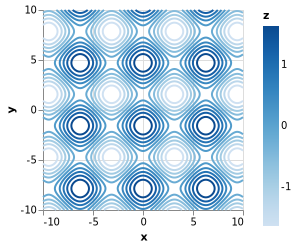

In [215]:
f(x,y) = cos(x) - sin(y)
lim = 10
y = -lim:0.1:lim
x = -lim:0.1:lim
QuickVega.contourplot(f,x,y)